In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from math import pi#, e
from matplotlib.font_manager import FontProperties
import pandas as pd
from headache.io.ascii import readcol
pd.set_option('display.max_rows', 1000)
mpl.rcParams['figure.facecolor'] = 'w'

def rebin(a, shape):
    sh = shape,len(a)//shape
    return a.reshape(sh).mean(-1)
  
def load_data(filename, data, fields, cols, fmt,
              ref=[], instru=[], mjd=[], freq=[], 
              flux=[], flux_min=[], flux_max=[], 
              uerr=[], lerr=[], nepoch=[], obs=[], frequnit='ghz'):
  lc = readcol(filename, cols=cols, fmt=fmt)
  nrow = len(lc[0])
  all_fields = ['ref', 'instru', 'mjd', 'freq', 'flux', 
                'flux_min', 'flux_max', 'uerr', 'lerr', 'nepoch', 'obs']
  tmp_data = {}
  ow_cols = []
  
  for i, af in enumerate(all_fields):
    tmp_data[af] = []
    n = len(eval(af))
    if n >= 1:
      n = nrow//n
      ow_cols.append(af)
      tmp_data[af].extend(eval(af)*n)
    else:
      if af in fields:
        idx = fields.index(af)
        if af == 'freq':
          if frequnit == 'hz':
            tmp_data[af].extend(1e9*lc[idx])
          elif frequnit == 'cm':
            tmp_data[af].extend(29.9792/lc[idx])
          elif frequnit == 'mm':
            tmp_data[af].extend(299.792/lc[idx])
          else:
            tmp_data[af].extend(lc[idx])
        else:  
          tmp_data[af].extend(lc[idx])
      else:
        if af == 'obs':
          tmp_data[af].extend([True]*nrow)
        else:
          tmp_data[af].extend([np.nan]*nrow)
    data[af].extend(tmp_data[af])

def add_entry(data,
              ref=[], instru=[], mjd=[], freq=[], 
              flux=[], flux_min=[], flux_max=[], 
              uerr=[], lerr=[], nepoch=[], obs=[], n=1):
    all_fields = ['ref', 'instru', 'mjd', 'freq', 'flux', 
                'flux_min', 'flux_max', 'uerr', 'lerr', 'nepoch', 'obs']
    for af in all_fields:
      if len(eval(af)) >= 1:
        data[af].extend(eval(af))
        n = len(eval(af))
      else:
        if af == 'obs':
          data[af].extend([True]*n)
        else:
          data[af].extend([np.nan]*n)

In [2]:
solarlum = 3.828e+26
DISTSGRAM = 2.523449542502775e+20
CKMS = 299792.0
SCALE = 1.e-26 * 4. * pi * DISTSGRAM**2. / solarlum * 1.e9

data = {'ref':[], 'instru':[], 'mjd':[], 'freq':[], 'flux':[], 
        'flux_min': [], 'flux_max':[], 'uerr':[], 'lerr':[], 'nepoch':[], 'obs':[]}

In [3]:
path = './'
sed_2 = np.genfromtxt(path + "SED_2.dat", dtype=float)
sed_2 = np.array(sed_2)
sed_2[:,0] /= 1.e9
sed_2[:,1] /= 1.e7 * solarlum

# Falcke et al. 1998

In [4]:
load_data(path + 'Falcke_1998.txt', data, 
          fields=['freq', 'flux', 'uerr', 'lerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Falcke et al. 1998'], 
          instru=['IRAM','IRAM', 'IRAM+Nobeyama', 'Nobeyama', 'IRAM', 
                  'IRAMa+Nobeyama+BIMA', 'Nobeyama', 'BIMA', 'VLA', 
                  'VLA', 'VLA', 'VLA', 'VLA', 'VLA', 'VLA', 'VLA'], 
          mjd=[50383.0])

# Zylka 1995

In [5]:
load_data(path + 'Zylka_1995.txt', data, 
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Zylka 1995'])

# Brinkering et al. 2015

In [6]:
load_data(path + 'Brinkerink_2015_100GHz.txt', data, 
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[100.0])

load_data(path + 'Brinkerink_2015_48GHz.txt', data, 
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[48.0])

load_data(path + 'Brinkerink_2015_39GHz.txt', data, 
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[39.0])

load_data(path + 'Brinkerink_2015_37GHz.txt', data,
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[37.0])

load_data(path + 'Brinkerink_2015_27GHz.txt', data, 
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[27.0])

load_data(path + 'Brinkerink_2015_25GHz.txt', data,
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[25.0])

load_data(path + 'Brinkerink_2015_100GHz.txt', data,
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[100.0])

load_data(path + 'Brinkerink_2015_19GHz.txt', data,
          fields=['mjd', 'flux'],
          cols=[0, 1], fmt='ff',
          ref=['Brinkerink et al. 2015'], 
          instru=['VLBA'], freq=[19.0])

# Bower et al. 2015

In [7]:
load_data(path + 'Bower_2015.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr', 'flux_min', 'flux_max', 'nepoch', 'instru'],
          cols=[0, 1, 2, 2, 3, 4, 5, 6], fmt='ffffffds',
          ref=['Bower et al. 2015'])

# Zhao et al. 2003

In [8]:
load_data(path + 'Zhao_2003.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Zhao et al. 2003'])

# Liu et al. 2016

In [9]:
load_data(path + 'Liu_2016.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Liu et al. 2016'])

# Herrnstein et al. 2004

In [10]:
load_data(path + 'Herrnstein_2004.txt', data,
          fields=['freq', 'nepoch', 'flux', 'flux_min', 'flux_max', 'lerr', 'uerr'],
          cols=[0, 1, 2, 3, 4, 5, 5], fmt='fdfffff',
          ref=['Herrnstein et al. 2004'])

# Serabyn et al. 1997

In [11]:
# freq = 850.0
# flux = 7.0*1.e-26*4.*pi*DISTSGRAM**2./solarlum*freq*1.e9
# err =  2.0*1.e-26*4.*pi*DISTSGRAM**2./solarlum*freq*1.e9
# add_entry(data, ref=['Serafyn et al. 1997'], freq=[freq], flux=[flux], uerr=[err], lerr=[err], n=1)
load_data(path + 'Serafyn_1997.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Serabyn et al. 1997'])

# Stone et al. 2016

In [12]:
# Stone et al. 2016
freq = CKMS/0.25/1.e3
flux = 0.5
err = 0.5
add_entry(data, ref=['Stone et al. 2016'], freq=[freq], flux=[flux], uerr=[err], n=1)

# Cotera 1999

In [13]:
freq = CKMS/0.0245/1.e3
flux = 0.900
add_entry(data, ref=['Cotera et al. 1999'], freq=[freq], flux=[flux], lerr=[flux*0.5], n=1)

# Baganoff 2003

In [14]:
freq = 1.21e9
flux = 2.4787159243784705e-08
lerr = 6.196789810946176e-09
uerr = 3.0983949054730883e-08
add_entry(data, ref=['Baganoff 2003'], freq=[freq], flux=[flux], lerr=[lerr], uerr=[uerr], n=1)

# von Fellenberg et al. 2018

In [15]:
# von Fellenberg et al. 2018
freq = CKMS/0.1/1.e3
flux = 1.04
err = 0.55
add_entry(data, ref=['von Fellenberg et al. 2018 (upper)'], freq=[freq], flux=[flux], lerr=[err], n=1)

freq = CKMS/0.16/1.e3
flux = 1.3
err = 0.65
add_entry(data, ref=['von Fellenberg et al. 2018 (upper)'], freq=[freq], flux=[flux], lerr=[err], n=1)

# von Fellenberg et al. 2018 (variable flux)
freq = CKMS/0.1/1.e3
flux = 0.16
err = 0.1
add_entry(data, ref=['von Fellenberg et al. 2018 (variable)'], freq=[freq], flux=[flux], lerr=[err], uerr=[err], n=1)

freq = CKMS/0.16/1.e3
flux = 0.27
err = 0.07
add_entry(data, ref=['von Fellenberg et al. 2018 (variable)'], freq=[freq], flux=[flux], lerr=[err], uerr=[err], n=1)

# Telesco et al. 1996

In [16]:
freq = CKMS/0.03/1.e3
flux = 1.4
err = 0.75
add_entry(data, ref=['Telesco et al. 1996'], freq=[freq], flux=[flux], lerr=[err], n=1)

# Dodds-Eden 2009

In [17]:
freq = CKMS/0.01188/1.e3
flux = 0.057
err = 0.03
add_entry(data, ref=['Dodds-Eden 2009'], freq=[freq], flux=[flux], lerr=[err], n=1)

# Dodds-Eden 2011

In [18]:
freq = CKMS/0.00218/1.e3
flux = 0.0011
add_entry(data, ref=['Dodds-Eden 2011'], freq=[freq], flux=[flux])

# Witzel et al. 2018

In [19]:
hh = 1.e-26 * 4. * pi * DISTSGRAM**2. / solarlum * CKMS/0.0022/1.e3 * 1.e9
hhh = 1.e-26 * 4. * pi * DISTSGRAM**2. / solarlum * CKMS/0.0045/1.e3 * 1.e9

freq = CKMS/0.0022/1.e3
flux = 0.002
lerr = 0.001
uerr = 0.005
add_entry(data, ref=['Witzel et al. 2018'], freq=[freq], flux=[flux], lerr=[lerr], uerr=[uerr], n=1)

freq = CKMS/0.0045/1.e3
flux = 0.0032
lerr = 0.0017
uerr = 0.0034
add_entry(data, ref=['Witzel et al. 2018'], freq=[freq], flux=[flux], lerr=[lerr], uerr=[uerr], n=1)

# Bower et al. 2019

In [20]:
load_data(path + 'Bower_2019.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Bower et al. 2019'])

# Backer et al. 1982

In [21]:
load_data(path + 'Backer_1982.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Backer et al. 1982'])

# Marrone et al. 2006

In [22]:
load_data(path + 'Marrone_2006.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['Marrone et al. 2006'])

# An et al. 2005

In [23]:
load_data(path + 'An_2005.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 2], fmt='ffff',
          ref=['An et al. 2005'], frequnit='mm')

# Wright et al. 1978

In [24]:
freq = 86.0
flux = 1.04
err = 0.15
add_entry(data, ref=['Wright et al. 1978'], freq=[freq], flux=[flux], uerr=[err], lerr=[err], n=1)

# Zylka et al. 1988

In [25]:
freq = 230.0
flux = 2.5
err = 0.6
add_entry(data, ref=['Zylka et al. 1988'], freq=[freq], flux=[flux], uerr=[err], lerr=[err], n=1)

# Yusef-Zadeh 1990

In [26]:
freq = 15.0
flux = 1.15
err = 0.01
add_entry(data, ref=['Yusef-Zadeh 1990'], freq=[freq], flux=[flux], uerr=[err], lerr=[err], n=1)

# Zylka et al. 1992

In [27]:
freq = [350.0, 860, 17000]
flux = [4.8, 18.5, 0.3]
uerr = [1.2, 9.0, 0]
lerr = [1.2, 9.0, 0.15]
add_entry(data, ref=['Zylka et al. 1992']*3, freq=freq, flux=flux, uerr=uerr, lerr=lerr, n=3)

# Schoedel et al. 2011

In [28]:
load_data(path + 'Schoedel_2011.txt', data,
          fields=['freq', 'flux', 'lerr', 'uerr'],
          cols=[0, 1, 2, 3], fmt='ffff',
          ref=['Schoedel et al. 2011'], frequnit='mm')

# GRAVITY Collaboration 2020

In [29]:
freq = CKMS/0.0022/1.e3
flux = 0.0011
err = 0.0003
add_entry(data, ref=['GRAVITY Collaboration 2020'], freq=[freq], flux=[flux], lerr=[err], uerr=[err], n=1)

# Yuan et al. 2003 SED model

In [30]:
freq = sed_2[:200, 0]
flux = sed_2[:200, 1]/(SCALE*freq)
n = len(freq)
add_entry(data, ref=['Yuan et al. 2003']*n, freq=freq, flux=flux, obs=[False]*n, n=n)

In [31]:
data = pd.DataFrame(data)
data['lerr'][data.lerr==0.0] = np.nan
data['uerr'][data.uerr==0.0] = np.nan
display(data)

/aux/vlb111a/conda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/aux/vlb111a/conda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ref               instru           mjd  \
0                       Falcke et al. 1998                 IRAM  50383.000000   
1                       Falcke et al. 1998                 IRAM  50383.000000   
2                       Falcke et al. 1998        IRAM+Nobeyama  50383.000000   
3                       Falcke et al. 1998             Nobeyama  50383.000000   
4                       Falcke et al. 1998                 IRAM  50383.000000   
5                       Falcke et al. 1998  IRAMa+Nobeyama+BIMA  50383.000000   
6                       Falcke et al. 1998             Nobeyama  50383.000000   
7                       Falcke et al. 1998                 BIMA  50383.000000   
8                       Falcke et al. 1998                  VLA  50383.000000   
9                       Falcke et al. 1998                  VLA  50383.000000   
10                      Falcke et al. 1998                  VLA  50383.000000   
11                      Falcke et al. 1998                  VLA  50383.000000   
12                      Falcke et al. 1998                  VLA  50383.000000   
13                      Falcke et al. 1998                  VLA  50383.000000   
14                      Falcke et al. 1998                  VLA  50383.000000   
15                      Falcke et al. 1998                  VLA  50383.000000   
16                              Zylka 1995                  NaN           NaN   
17                              Zylka 1995                  NaN           NaN   
18                              Zylka 1995                  NaN           NaN   
19                              Zylka 1995                  NaN           NaN   
20                  Brinkerink et al. 2015                 VLBA      6.602162   
21                  Brinkerink et al. 2015                 VLBA      6.922162   
22                  Brinkerink et al. 2015                 VLBA      7.237838   
23                  Brinkerink et al. 2015                 VLBA      7.895135   
24                  Brinkerink et al. 2015                 VLBA      8.210811   
25                  Brinkerink et al. 2015                 VLBA      8.500541   
26                  Brinkerink et al. 2015                 VLBA      8.790270   
27                  Brinkerink et al. 2015                 VLBA      9.080000   
28                  Brinkerink et al. 2015                 VLBA      9.711351   
29                  Brinkerink et al. 2015                 VLBA     10.001081   
30                  Brinkerink et al. 2015                 VLBA     10.286486   
31                  Brinkerink et al. 2015                 VLBA     10.576216   
32                  Brinkerink et al. 2015                 VLBA     10.852973   
33                  Brinkerink et al. 2015                 VLBA      7.031271   
34                  Brinkerink et al. 2015                 VLBA      7.137433   
35                  Brinkerink et al. 2015                 VLBA      7.231840   
36                  Brinkerink et al. 2015                 VLBA      7.334632   
37                  Brinkerink et al. 2015                 VLBA      7.434534   
38                  Brinkerink et al. 2015                 VLBA      7.531320   
39                  Brinkerink et al. 2015                 VLBA      7.632327   
40                  Brinkerink et al. 2015                 VLBA      7.728236   
41                  Brinkerink et al. 2015                 VLBA      7.827260   
42                  Brinkerink et al. 2015                 VLBA      7.978685   
43                  Brinkerink et al. 2015                 VLBA      8.084366   
44                  Brinkerink et al. 2015                 VLBA      8.179311   
45                  Brinkerink et al. 2015                 VLBA      8.278194   
46                  Brinkerink et al. 2015                 VLBA      8.377643   
47                  Brinkerink et al. 2015                 VLBA      8.477772   
48                  Brinkerink et al. 2015                 VLBA      8

In [32]:
data.to_csv('SGRA_FLUX_FREQ.csv',index=False)

(0.0001, 1000.0)

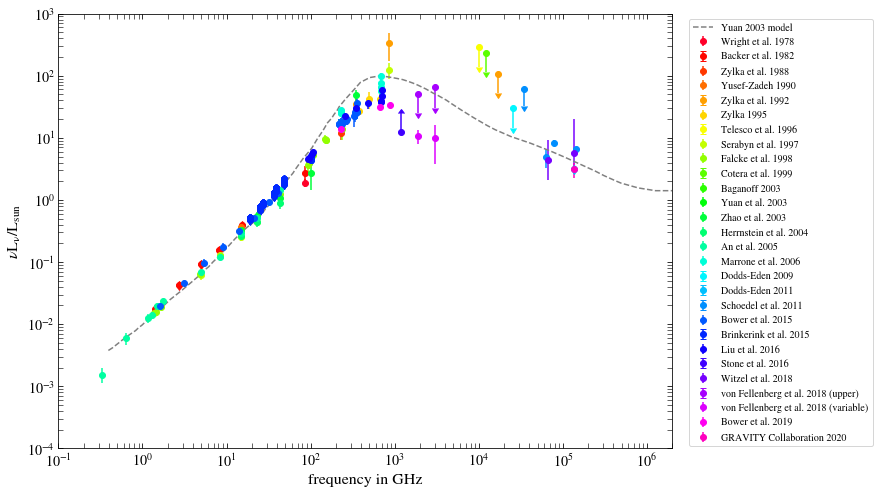

In [33]:
refs = list(set(data.ref))
nrefs = len(refs)
pub_years = [int([r for r in ref.split() if r.isdigit()][0]) for ref in refs]
refs = [ref for _x,ref in sorted(zip(pub_years,refs))]

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=nrefs-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

fontP = FontProperties()
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(nrefs)])
for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux*SCALE*data[flt].freq,
               yerr=[data[flt].lerr*SCALE*data[flt].freq, data[flt].uerr*SCALE*data[flt].freq], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)

# load the model predictions
flt = data.obs == False
plt.plot(data[flt].freq, data[flt].flux*SCALE*data[flt].freq, color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel(r'$\nu\rm{L}_{\nu}/ \rm{L}_{\rm{sun}}$', fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', prop=fontP, frameon=True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 2e6)
plt.ylim(1e-4, 1e3)
# plt.savefig("SED_SgrA.pdf",bbox_inches='tight', format='pdf')
# plt.show()

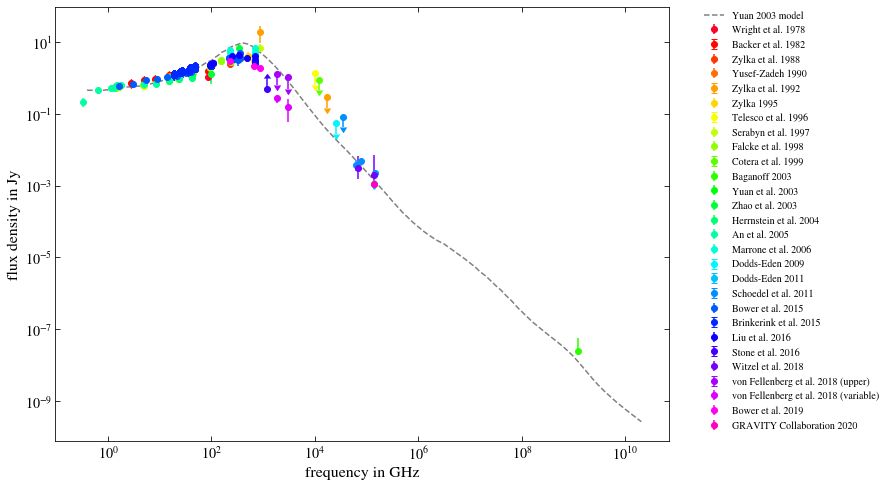

In [34]:
# refs = list(set(data.ref))
# refs.sort()

fontP = FontProperties()
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(nrefs)])
for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)
  
# load the model predictions
flt = data.obs == False
plt.plot(data[flt].freq, data[flt].flux, color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel("flux density in Jy", fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.savefig("flux_density_SED_SgrA.pdf",bbox_inches='tight', format='pdf')
# plt.show()